In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import skewnorm
from scipy.stats import norm

import numpy as np
import pickle

import sys
sys.path.append("../")

from prediction import construct_predictions
from utils import gather_data

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load data and construct predictions

- **Width** data is a 4D array "indexed" by
(delta, module, dimension, trial)
- **Prediction** data is a 3D array "indexed" by (modules, dimensions, delta)


In [6]:
"""
    Load the ND data, 
    which we want to analyze
"""  


path = "../data/ND_data_filtered"
W = gather_data(path, "width")

W        = W[0,:,:,:]
log_mean = np.mean(np.log(W), axis=2)
log_std  = np.std(np.log(W), axis=2)





In [8]:
"""
    Load the 1D data, 
    for predictions
"""

path = "../data/1D_data_for_prediction" 
X    = gather_data(path)

X = X[:, :, 0, :]
X = np.swapaxes(X, 0,1)

logX       = np.log(X)
prediction = construct_predictions(logX[:,:], range(1,10), range(1,7), range(5), raw=False)



In [117]:
ms     = np.arange(1,10)
ks     = np.array([3,4,5,6])


## Creating Figures

- Figure 5a
- Figure 5b

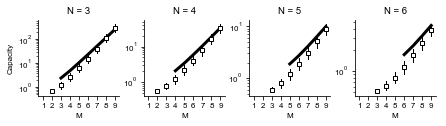

In [20]:
"""
    Figure 5a
"""

plt.rc("font",**{"family": "sans-serif","sans-serif": ["Arial"],"size": 8})
fig, axes = plt.subplots(figsize=(6., 1.55), ncols=len(ks[:4]), sharey=False,  tight_layout = {"pad": 0})

axes[0].set_ylabel("Capacity")
for i,ax in enumerate(axes):

    ax.set_title("N = {}".format(ks[i]))
    ax.set_xticks(ms)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xlabel("M")
    ax.set_yscale("log")

    ax.set_xticks(ms)
    ax.set_xlim(0.5,ms[-1]+.5)

    
    k  = ks[i]
    k_ = i

    
    valid = np.where(ms>=k)[0]

    
    ax.plot(ms[valid], prediction[valid,k - 1,1], 
                color="black",
                linewidth= 3,
                linestyle="-",
                marker="None", markersize=2 , markerfacecolor="black") 


    valid = np.where(2*ms>=k)[0] 
    a = np.exp(log_mean - 1*log_std)[valid,k_]
    b = np.exp(log_mean)[valid,k_]
    c = np.exp(log_mean + 1*log_std)[valid,k_]
            
    ax.plot( [ms[valid],ms[valid]] ,[a,c], linewidth=1.,color="black",linestyle="-", alpha=1.)
    ax.plot(ms[valid], b, marker="s", color="black", markerfacecolor= "white",markersize=4,linewidth=1., linestyle="none")
    

plt.savefig("../Figures/Capacity_Figure_5a.pdf", dpi=300, transparent=False)


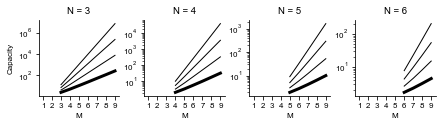

In [18]:
"""
    Figure 5b
"""

plt.rc("font",**{"family": "sans-serif","sans-serif": ["Arial"],"size": 8})
fig, axes = plt.subplots(figsize=(6., 1.55), ncols=len(ks[:4]), sharey=False,  tight_layout = {"pad": 0})

axes[0].set_ylabel("Capacity")
for i,ax in enumerate(axes):

    ax.set_title("N = {}".format(ks[i]))
    ax.set_xticks(ms)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xlabel("M")
    ax.set_yscale("log")
    ax.set_xticks(ms)
    ax.set_xlim(0.5,ms[-1]+.5)

    
    k     = ks[i]
    valid = np.where(ms>=k)[0]
    for d in range(1,5):
        l = 3. if d == 1 else 1
        c = "black" 
        ax.plot(ms[valid], prediction[valid,k - 1,d], 
                color=c,
                linewidth= l,
                linestyle="-",
                marker="None", markersize=2 , markerfacecolor="black") 


plt.savefig("../Figures/Capacity_Figure_5b.pdf", dpi=300, transparent=False)
